<a href="https://colab.research.google.com/github/nafiul-araf/Anomaly-Detection/blob/main/Statistical_Approaches_to_Identify_the_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Reference:*** https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

###Data Generation

In [57]:
import numpy as np
np.random.seed(10)

In [58]:
data=5*np.random.randn(10000)+50
print("Mean: %.3f Standard Deviation: %.3f"%(np.mean(data), np.std(data)))

Mean: 50.026 Standard Deviation: 4.948


###Standard Deviation Method

In [59]:
#We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 
#3 standard deviations from the mean.
data_mean, data_std=np.mean(data), np.std(data)
data_mean, data_std

(50.02551028000958, 4.948320063858475)

In [60]:
cut_off=data_std*3
lower_cut_off, upper_cut_off=data_mean-cut_off, data_mean+cut_off
lower_cut_off, upper_cut_off

(35.18055008843415, 64.87047047158501)

In [61]:
outliers_std=[x for x in data if x<lower_cut_off or x>upper_cut_off]
print(outliers_std)

[35.10201614469433, 33.977993278351846, 33.41165473849287, 34.436775281971826, 68.04580353731704, 67.27422491769582, 64.99594916903482, 33.138264942547835, 33.03445692944898, 65.96685551542342, 65.88526701761921, 65.79436510715269, 65.38533956079448, 65.71142433065138, 31.89180601869646, 65.1362006470765, 33.48224237613188, 33.92985144678716, 35.164193414777074, 67.80609673822539, 64.9866166761536, 68.45744665196786, 35.11040041934387, 35.11511008360985, 35.164932399818014, 66.43185222924286, 67.51654295476995]


In [62]:
outliers_removed_std=[x for x in data if x>=lower_cut_off and x<=upper_cut_off]
print(outliers_removed_std)

[56.65793252064759, 53.57639487199203, 42.27299853944366, 49.95808075035739, 53.1066798694524, 46.399572196405515, 51.3275579284606, 50.54274262857485, 50.021457154670166, 49.1269989470353, 52.16513094976799, 56.01518686906106, 45.17467164741618, 55.14137038991352, 51.1431506506233, 52.22568806415174, 44.31698894084478, 50.67568439224318, 57.42268500918291, 44.60097557107362, 40.11135859671047, 41.28313852050546, 51.33035082000276, 61.92483665355549, 55.618456267047115, 58.36311106653914, 50.49574607917622, 56.98998188546788, 48.6437600601711, 53.06602092429819, 48.663414056632156, 47.2534549294726, 50.66354147879976, 47.61928992536331, 56.54236540431739, 50.97506639616547, 52.00104994126174, 48.31183831457235, 56.28236131877578, 46.34015248999396, 53.301157756131566, 48.24564054280064, 45.30283320118724, 47.553313915576744, 45.97704428865023, 48.93651180644744, 48.30429876968282, 51.56084968156611, 52.82576334828314, 49.2628987113649, 49.87047331591907, 51.44547101901968, 47.300604643

In [63]:
print('Identified outliers: %d' % len(outliers_std))
print('Non-outlier observations: %d' % len(outliers_removed_std))

Identified outliers: 27
Non-outlier observations: 9973


###IQR Method

In [64]:
#find interquartile range
q25, q75=np.percentile(data, 25), np.percentile(data, 75)
iqr=q75-q25
print('The 25th Percentile is %.3f and the 75th Percentile is %.3f'%(q25, q75))
print('The IQR is %.3f'%iqr)

The 25th Percentile is 46.739 and the 75th Percentile is 53.375
The IQR is 6.636


In [65]:
#We can then calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 
#75th percentile to give the actual limits on the data.
cut_off=iqr*1.5
lower_cut_off, upper_cut_off=q25-cut_off, q75+cut_off
lower_cut_off, upper_cut_off

(36.78459640995784, 63.32956614430755)

In [66]:
outliers_iqr=[x for x in data if x<lower_cut_off or x>upper_cut_off]
print(outliers_iqr)

[35.10201614469433, 63.39955153989658, 33.977993278351846, 63.35842544456081, 35.91999391424495, 35.92469346115358, 33.41165473849287, 63.965828808655715, 34.436775281971826, 68.04580353731704, 64.0976099942864, 36.463850333541856, 35.972421475256226, 36.19022036001505, 35.68809173950471, 36.42429396632475, 35.85266061165693, 36.448349065182946, 36.324344683207855, 64.73549353215228, 36.39304909228931, 36.236883807360776, 36.61566257455514, 36.021925298447925, 67.27422491769582, 36.06330179210105, 63.375385799361595, 64.99594916903482, 64.62662124441576, 63.367288441560966, 35.84111019306448, 35.89470768442123, 33.138264942547835, 33.03445692944898, 65.96685551542342, 64.29936650862035, 64.16271523988311, 35.79170477378178, 36.23379123805648, 65.88526701761921, 65.79436510715269, 64.28484765097664, 65.38533956079448, 63.54243984981003, 65.71142433065138, 36.46534832267042, 63.99266997053104, 31.89180601869646, 65.1362006470765, 35.79722186281781, 36.24816928816192, 33.48224237613188, 3

In [67]:
outliers_removed_iqr=[x for x in data if x>=lower_cut_off and x<=upper_cut_off]
print(outliers_removed_iqr)

[56.65793252064759, 53.57639487199203, 42.27299853944366, 49.95808075035739, 53.1066798694524, 46.399572196405515, 51.3275579284606, 50.54274262857485, 50.021457154670166, 49.1269989470353, 52.16513094976799, 56.01518686906106, 45.17467164741618, 55.14137038991352, 51.1431506506233, 52.22568806415174, 44.31698894084478, 50.67568439224318, 57.42268500918291, 44.60097557107362, 40.11135859671047, 41.28313852050546, 51.33035082000276, 61.92483665355549, 55.618456267047115, 58.36311106653914, 50.49574607917622, 56.98998188546788, 48.6437600601711, 53.06602092429819, 48.663414056632156, 47.2534549294726, 50.66354147879976, 47.61928992536331, 56.54236540431739, 50.97506639616547, 52.00104994126174, 48.31183831457235, 56.28236131877578, 46.34015248999396, 53.301157756131566, 48.24564054280064, 45.30283320118724, 47.553313915576744, 45.97704428865023, 48.93651180644744, 48.30429876968282, 51.56084968156611, 52.82576334828314, 49.2628987113649, 49.87047331591907, 51.44547101901968, 47.300604643

In [68]:
print('Identified outliers: %d' % len(outliers_iqr))
print('Non-outlier observations: %d' % len(outliers_removed_iqr))

Identified outliers: 74
Non-outlier observations: 9926


###Visualization

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [70]:
def plot_histogram(d, bins, density, xlabel, title):
  plt.figure(figsize=(15, 6))
  plt.hist(d, bins=bins, density=density)
  plt.xlabel(xlabel, fontsize=15)
  plt.title(title, fontsize=15)
  plt.show()

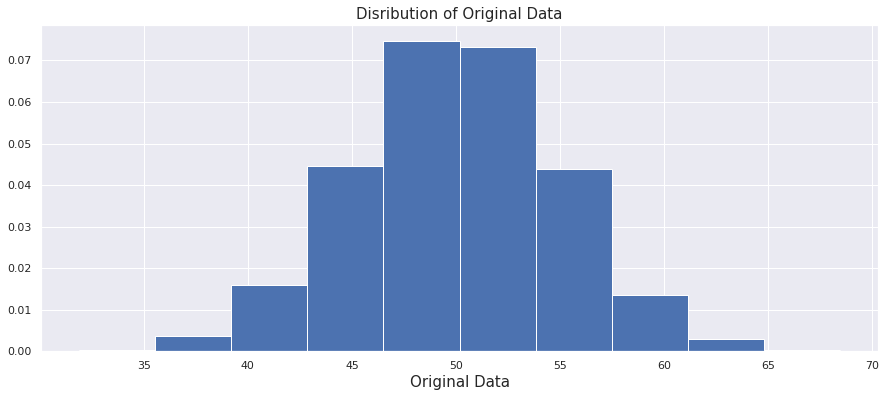

In [71]:
plot_histogram(d=data, bins=10, density=True, xlabel='Original Data', title='Disribution of Original Data')

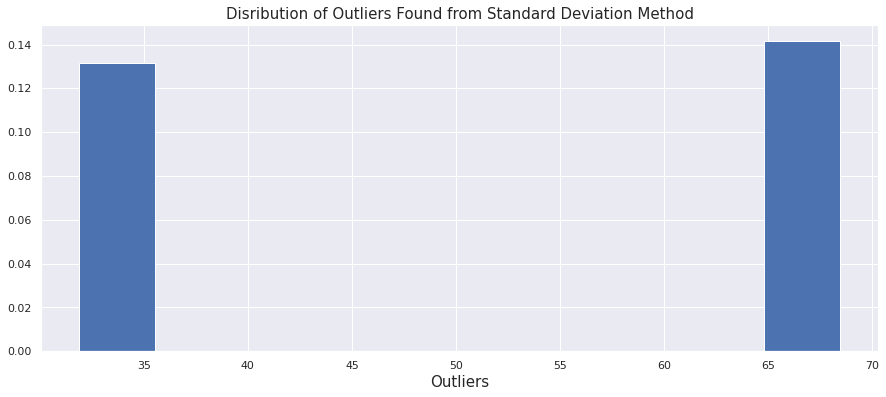

In [72]:
plot_histogram(d=outliers_std, bins=10, density=True, xlabel='Outliers', title='Disribution of Outliers Found from Standard Deviation Method')

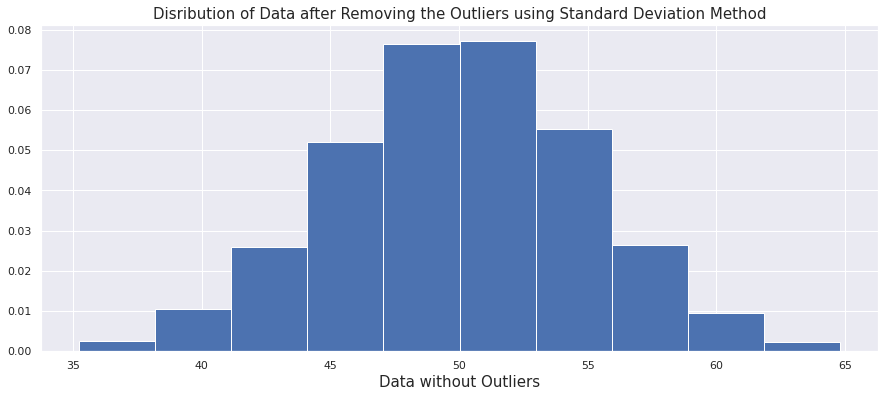

In [73]:
plot_histogram(d=outliers_removed_std, bins=10, density=True, xlabel='Data without Outliers', 
               title='Disribution of Data after Removing the Outliers using Standard Deviation Method')

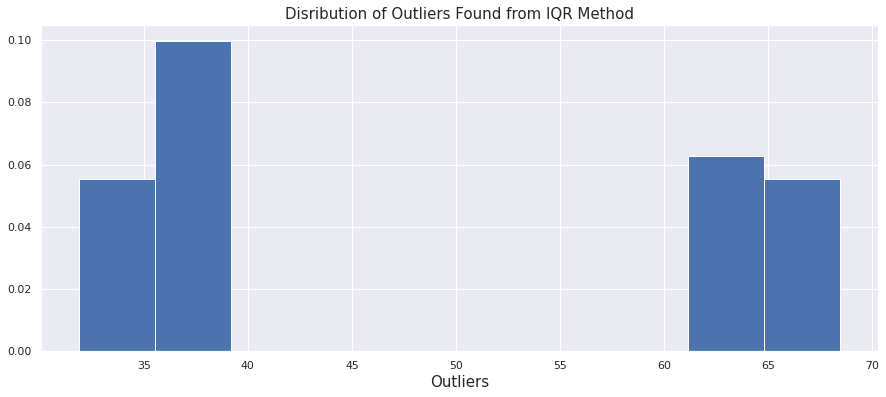

In [74]:
plot_histogram(d=outliers_iqr, bins=10, density=True, xlabel='Outliers', title='Disribution of Outliers Found from IQR Method')

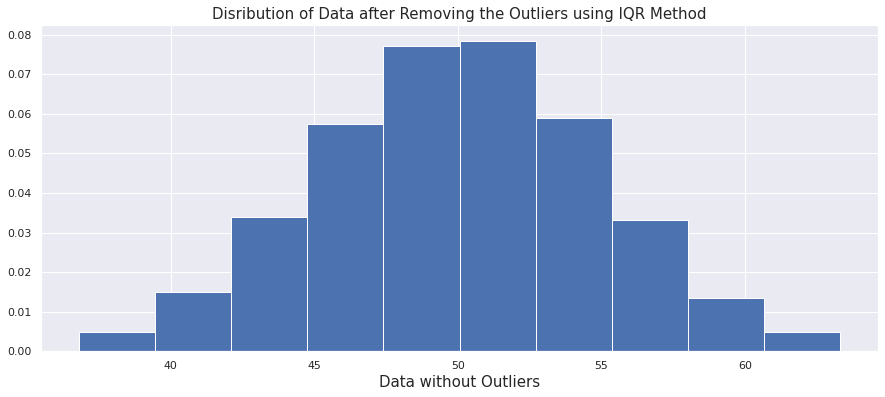

In [75]:
plot_histogram(d=outliers_removed_iqr, bins=10, density=True, xlabel='Data without Outliers', 
               title='Disribution of Data after Removing the Outliers using IQR Method')